#### operation on column names

In [124]:
df = pd.DataFrame({'a':[1,1,1,2,2,3,4,5],
                  'b':[10,10,11,20,0,0,40,50],
                  'c':['apple','apple','plum','pear','plum','apple','apple','apple']})
df

,a,b,c
0,1,10,apple
1,1,10,apple
2,1,11,plum
3,2,20,pear
4,2,0,plum
5,3,0,apple
6,4,40,apple
7,5,50,apple


In [125]:
df.columns

Index(['a', 'b', 'c'], dtype='object')

In [126]:
df.rename(columns={'a':'A',
                  'b':'B'}, inplace=True)

In [127]:
df.columns

Index(['A', 'B', 'c'], dtype='object')

In [128]:
df.columns = ['aa','bb','cc']

In [129]:
df

,aa,bb,cc
0,1,10,apple
1,1,10,apple
2,1,11,plum
3,2,20,pear
4,2,0,plum
5,3,0,apple
6,4,40,apple
7,5,50,apple


#### String operations

In [134]:
mystring = 'This is an apple '
mystring

'This is an apple '

In [135]:
mystring.strip(' ')

'This is an apple'

In [151]:
mystring.strip('This')

' is an apple '

In [214]:
mystring.replace('apple','pear')

'This is an pear '

In [136]:
mystring.split(' ')

['This', 'is', 'an', 'apple', '']

In [215]:
mystring.replace('apple','pear').strip(' ').split(' ')

['This', 'is', 'an', 'pear']

In [146]:
one_char = mystring[0]
one_char

'T'

In [147]:
one_char.islower(), one_char.isupper()

(False, True)

In [148]:
mystring.upper()

'THIS IS AN APPLE '

In [150]:
' '.join(['This', 'is', 'an', 'apple'])

'This is an apple'

#### Regular expressions

Search

In [152]:
import re

In [174]:
pattern = 'pattern'
text = 'Is the pattern in here?'
match = re.search(pattern, text)

In [175]:
match

<_sre.SRE_Match object; span=(7, 14), match='pattern'>

In [176]:
match.start(), match.end()

(7, 14)

In [167]:
match.group()

'pattern'

In [177]:
if match:
    print('Pattern is found')

Pattern is found


Multiple occurrences

In [178]:
pattern = 'er'
text = 'There can be multiple patterns as well'

In [180]:
all_matches = re.findall(pattern, text)
all_matches

['er', 'er']

Finding regular expressions

In [194]:
text = 'abbaaabbbbaaaaa'
patterns = ['ab*',     # a followed by zero or more b
            'ab+',     # a followed by one or more b
            'ab?',     # a followed by zero or one b
            'ab{3}']   # a followed by three b

print(text)
for p in patterns:
    print(p, re.findall(p, text))

abbaaabbbbaaaaa
ab* ['abb', 'a', 'a', 'abbbb', 'a', 'a', 'a', 'a', 'a']
ab+ ['abb', 'abbbb']
ab? ['ab', 'a', 'a', 'ab', 'a', 'a', 'a', 'a', 'a']
ab{3} ['abbb']


In [203]:
text = 'ab aag AB somethingAAG'
patterns = ['[ab]+',     # either a or b
            '[AB]+',     # either a or b upper case
            '[a-z]+',     # any lower case letter
            '[A-Z]+',    # any upper case letter
            'something[A-Z]',
            '[a-zA-Z]+']  

print(text)
for p in patterns:
    print(p, re.findall(p, text))

ab aag AB somethingAAG
[ab]+ ['ab', 'aa']
[AB]+ ['AB', 'AA']
[a-z]+ ['ab', 'aag', 'something']
[A-Z]+ ['AB', 'AAG']
something[A-Z] ['somethingA']
[a-zA-Z]+ ['ab', 'aag', 'AB', 'somethingAAG']


In [206]:
text = 'You can. also find - without'
patterns = ['[^-. ]+',  # sequences without -, ., or space]  
            'a.', # a followed by any charachter
            'f.*d'] # f followed by any charachters ending with d

print(text)
for p in patterns:
    print(p, re.findall(p, text))

You can. also find - without
[^-. ]+ ['You', 'can', 'also', 'find', 'without']
a. ['an', 'al']
f.*d ['find']


In [207]:
text = 'Finding different types 1,2,3'
patterns = [r'\d+', # sequence of digits
                r'\D+', # sequence of non-digits
                r'\s+', # sequence of whitespace
                r'\S+', # sequence of non-whitespace
                r'\w+', # alphanumeric characters
                r'\W+', # non-alphanumeric
           ]

print(text)
for p in patterns:
    print(p, re.findall(p, text))

Finding different types 1,2,3
\d+ ['1', '2', '3']
\D+ ['Finding different types ', ',', ',']
\s+ [' ', ' ', ' ']
\S+ ['Finding', 'different', 'types', '1,2,3']
\w+ ['Finding', 'different', 'types', '1', '2', '3']
\W+ [' ', ' ', ' ', ',', ',']


#### List comprehension

In [208]:
mylist = ['adam','bruno','cecile']
new_list = []
for l in mylist:
    new_list.append(l.capitalize())
new_list

['Adam', 'Bruno', 'Cecile']

In [209]:
[x.capitalize() for x in mylist]

['Adam', 'Bruno', 'Cecile']

In [212]:
[x.capitalize() for x in mylist if not x.startswith('a')]

['Bruno', 'Cecile']

In [213]:
[re.findall('[aeiou]', x) for x in mylist]

[['a', 'a'], ['u', 'o'], ['e', 'i', 'e']]

## Excluding days with extreme weather conditions

### 1 - exercise

Import the pandas library and load the weather_filled.csv file you downloaded from the class 5 folder into a dataframe called weather. <br>
Check the name of the columns. Is the nameing consistent? 

In [ ]:
# Your code here


### 1 - check yourself

No, there are column names with an extra space at the end of the name <br>
and column names where the underscore is missing from between the words

### 2 - exercise

Correct these mistakes! You can choose how to do it, but at the end remove the space from the column names and put underscores wherever needed. <br><br> You can loop through the column names and use string operations to insert the underscore where needed. You can also use the re module to find these occurrences. With the re module you can do the replacement in one step as well. <br>
You can rename the columns inside the loop or you can build a list of the new column names and assign this new list as the new column names. You can use list comprehension for this.

In [326]:
weather = pd.read_csv('weather_filled.csv')
for c in weather.columns:
    new_c = ''
    for i in range(len(c) - 1):
        if c[i].islower() and c[i+1].isupper():
            new_c += c[i] + '_'
        else:
            new_c += c[i]
    new_c += c[-1]
    weather.rename(columns={c:new_c.strip(' ')}, inplace=True)


In [ ]:

import re

weather = pd.read_csv('weather_filled.csv')
new_names = []
for c in weather.columns:
    missing_underscores = re.findall(r"[a-z][A-Z]", c)
    for mu in missing_underscores:
        c = c.replace(mu, mu[0] + '_' + mu[1])
    new_names.append(c.strip(' '))
weather.columns = new_names



In [ ]:
re.sub(r"([a-z])([A-Z])", r"\1_\2", "MeanDew_Point_F")

In [ ]:
weather = pd.read_csv('weather_filled.csv')
weather.columns = [re.sub(r"([a-z])([A-Z])", r"\1_\2", x).strip(' ') for x in weather.columns]

### 2 - check yourself

In [327]:
if list(weather.columns) == ['Date', 'Max_Temperature_F', 'Mean_Temperature_F', 'Min_Temperature_F',
       'Max_Dew_Point_F', 'Mean_Dew_Point_F', 'Min_Dewpoint_F', 'Max_Humidity',
       'Mean_Humidity', 'Min_Humidity', 'Max_Sea_Level_Pressure_In',
       'Mean_Sea_Level_Pressure_In', 'Min_Sea_Level_Pressure_In',
       'Max_Visibility_Miles', 'Mean_Visibility_Miles', 'Min_Visibility_Miles',
       'Max_Wind_Speed_MPH', 'Mean_Wind_Speed_MPH', 'Max_Gust_Speed_MPH',
       'Precipitation_In', 'Cloud_Cover', 'Events', 'Wind_Dir_Degrees',
       'landmark']:
    print('The column names are correct')
else:
    print('The column names are NOT correct')

The column names are correct


#### Changing type of columns

In [230]:
df = pd.DataFrame({'a':['1','2','3'],
                  'b':['1','2','3'],
                  'c':['1','2','3'],
                  'd':['1','2','3'],
                  'e':['A','2','3']})
df

,a,b,c,d,e
0,1,1,1,1,A
1,2,2,2,2,2
2,3,3,3,3,3


In [231]:
df.dtypes

a    object
b    object
c    object
d    object
e    object
dtype: object

In [238]:
df['b'] = df['b'].astype(int)
df['c'] = df['c'].astype(float)
df

,a,b,c,d,e
0,1,1,1.0,1,A
1,2,2,2.0,2,2
2,3,3,3.0,3,3


In [239]:
df.dtypes

a      object
b       int64
c     float64
d    category
e      object
dtype: object

In [240]:
df['d'] = df['d'].astype('category')
df

,a,b,c,d,e
0,1,1,1.0,1,A
1,2,2,2.0,2,2
2,3,3,3.0,3,3


In [241]:
df.dtypes

a      object
b       int64
c     float64
d    category
e      object
dtype: object

In [242]:
df['d']

0    1
1    2
2    3
Name: d, dtype: category
Categories (3, int64): [1, 2, 3]

In [250]:
pd.Series(['foo','bar']*1000).nbytes

16000

In [251]:
pd.Series(['foo','bar']*1000).astype('category').nbytes

2016

In [252]:
df['e'] = df['e'].astype(float)

ValueError: could not convert string to float: 'A'

In [253]:
df['e'] = df['e'].replace('A',0).astype(float)

In [254]:
df

,a,b,c,d,e
0,1,1,1.0,1,0.0
1,2,2,2.0,2,2.0
2,3,3,3.0,3,3.0


#### Boxplot

In [272]:
df = pd.DataFrame({'a':np.random.rand(100),
                  'b':np.random.rand(100)})

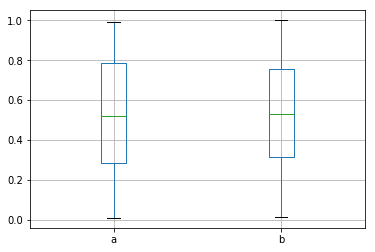

In [273]:
df.boxplot()

In [286]:
df = pd.DataFrame({'a':np.random.rand(100),
                  'b':np.random.uniform(0,100,100)})

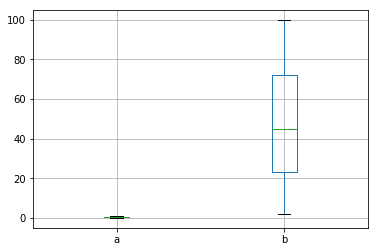

In [276]:
df.boxplot()

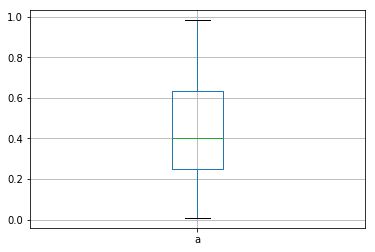

In [278]:
df.boxplot('a')

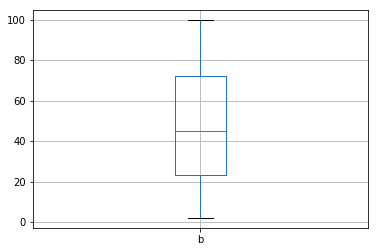

In [279]:
df.boxplot('b')

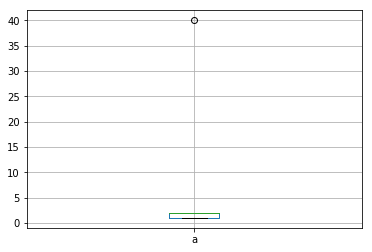

In [294]:
df = pd.DataFrame({'a':[1,2]*50 + [40]})
df.boxplot('a')

#### Change values in columns based on condition

In [305]:
import numpy as np

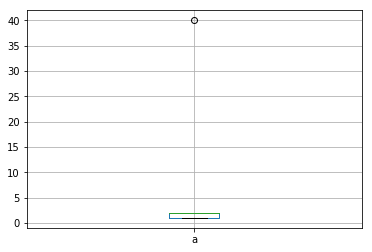

In [309]:
df = pd.DataFrame({'a':[1,2]*50 + [40]})
df.boxplot('a')

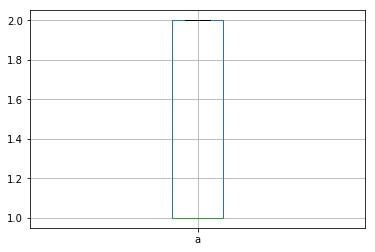

In [310]:
df['a'] = np.where(df['a'] > 5, 1, df['a'])
df.boxplot('a')

In [311]:
df = pd.DataFrame({'a':['apple','potato','plum','carrot','plum','apple','bean','apple']})
df

,a
0,apple
1,potato
2,plum
3,carrot
4,plum
5,apple
6,bean
7,apple


In [312]:
df['category'] = np.where(df['a'].isin(['apple','plum']), 'fruit','vegetable')
df

,a,category
0,apple,fruit
1,potato,vegetable
2,plum,fruit
3,carrot,vegetable
4,plum,fruit
5,apple,fruit
6,bean,vegetable
7,apple,fruit


In [313]:
df = pd.DataFrame({'a':['apple','potato','pizza','plum','carrot','plum','apple','bean','apple','pizza']})
df['category'] = np.where(df['a'] == 'pizza', df['a'],
                    np.where(df['a'].isin(['apple','plum']), 'fruit','vegetable'))
df

,a,category
0,apple,fruit
1,potato,vegetable
2,pizza,pizza
3,plum,fruit
4,carrot,vegetable
5,plum,fruit
6,apple,fruit
7,bean,vegetable
8,apple,fruit
9,pizza,pizza


In [314]:
df = pd.DataFrame({'first_name':['John','Kovacs','Peter'],
                  'last_name':['Smith','Peter','Black'],
                  'nationality':['US','HUN','US']})
df

,first_name,last_name,nationality
0,John,Smith,US
1,Kovacs,Peter,HUN
2,Peter,Black,US


In [315]:
df['real_last_name'] = np.where(df['nationality'] == 'US', df['last_name'], df['first_name'])
df

,first_name,last_name,nationality,real_last_name
0,John,Smith,US,Smith
1,Kovacs,Peter,HUN,Kovacs
2,Peter,Black,US,Black


#### Set

In [172]:
set_a = {'apple','plum','plum','pear'}
set_a

{'apple', 'pear', 'plum'}

In [174]:
US_spies = {'John','Anton','Brad','Dimitrij'}
russian_spies = {'Pavlov', 'Mikhail', 'Dimitrij','John', 'Alexander'}

In [175]:
loyal_US_spies = US_spies.difference(russian_spies)
loyal_US_spies

{'Anton', 'Brad'}

In [176]:
double_agents = US_spies.intersection(russian_spies)
double_agents

{'Dimitrij', 'John'}

In [177]:
all_spies = US_spies.union(russian_spies)
all_spies

{'Alexander', 'Anton', 'Brad', 'Dimitrij', 'John', 'Mikhail', 'Pavlov'}

In [190]:
us_df = pd.DataFrame({'spies':['Anton', 'Anton', 'Brad', 'Brad', 'Brad','Dimitrij', 'Dimitrij', 'John', 'John'],
                     'contacted':pd.date_range(start='1/1/1960', end='1/9/1960')})
russia_df = pd.DataFrame({'spies':['Pavlov', 'Mikhail', 'Dimitrij','John', 'Alexander', 'Pavlov', 'Mikhail', 'Dimitrij','John', 'Alexander', 'Pavlov', 'Mikhail', 'Dimitrij','John', 'Alexander'],
                     'contacted':pd.date_range(start='1/1/1960', end='1/15/1960')})

In [187]:
us_df

,contacted,spies
0,2018-01-01,Anton
1,2018-01-02,Anton
2,2018-01-03,Brad
3,2018-01-04,Brad
4,2018-01-05,Brad
5,2018-01-06,Dimitrij
6,2018-01-07,Dimitrij
7,2018-01-08,John
8,2018-01-09,John


In [191]:
russia_df

,contacted,spies
0,1960-01-01,Pavlov
1,1960-01-02,Mikhail
2,1960-01-03,Dimitrij
3,1960-01-04,John
4,1960-01-05,Alexander
5,1960-01-06,Pavlov
6,1960-01-07,Mikhail
7,1960-01-08,Dimitrij
8,1960-01-09,John
9,1960-01-10,Alexander


In [193]:
us_df['spies'].tolist()

['Anton',
 'Anton',
 'Brad',
 'Brad',
 'Brad',
 'Dimitrij',
 'Dimitrij',
 'John',
 'John']

In [194]:
set(us_df['spies'].tolist())

{'Anton', 'Brad', 'Dimitrij', 'John'}

In [197]:
double_agents = set(us_df['spies'].tolist()).intersection(set(russia_df['spies'].tolist()))
double_agents

{'Dimitrij', 'John'}

### 3 - exercise
Look at the data type of all the columns. Is there any that looks incorrect?

In [328]:
weather.dtypes

Date                           object
Max_Temperature_F             float64
Mean_Temperature_F            float64
Min_Temperature_F             float64
Max_Dew_Point_F                 int64
Mean_Dew_Point_F                int64
Min_Dewpoint_F                  int64
Max_Humidity                    int64
Mean_Humidity                   int64
Min_Humidity                    int64
Max_Sea_Level_Pressure_In     float64
Mean_Sea_Level_Pressure_In    float64
Min_Sea_Level_Pressure_In     float64
Max_Visibility_Miles            int64
Mean_Visibility_Miles           int64
Min_Visibility_Miles            int64
Max_Wind_Speed_MPH              int64
Mean_Wind_Speed_MPH             int64
Max_Gust_Speed_MPH            float64
Precipitation_In               object
Cloud_Cover                     int64
Events                         object
Wind_Dir_Degrees                int64
landmark                       object
dtype: object

### 3 - check yourself

Yes, the Precipitation_In should be numeric

### 4 - exercise

Look at the unique values in the Precipitation_In column. Repalce the one that is not numeric with 0 (T means traces of rain) and than convert the column to float type!

In [329]:
weather['Precipitation_In'].unique()

array(['0', '0.23', 'T', '0.01', '0.17', '0.42', '0.08', '0.04', '0.09',
       '0.53', '0.07', '0.03', '0.02', '0.0', '0.83', '1.06', '1.71',
       '0.37', '0.27', '0.22', '0.45', '0.78', '0.88', '0.66', '0.29',
       '0.47', '0.1', '0.61', '0.14', '0.05', '0.68', '0.97', '0.28',
       '0.63', '0.06', '0.85', '0.64', '0.35', '0.43', '0.74', '0.12',
       '0.16', '0.49'], dtype=object)

In [330]:
weather['Precipitation_In'].replace('T','0', inplace=True)

weather['Precipitation_In'] = weather['Precipitation_In'].astype(float)

### 4 - check yourself

In [331]:
if weather['Precipitation_In'].dtype == float:
    print('The conversion was correct')
else:
    print('The conversion was NOT correct')

The conversion was correct


### 5 - exercise
For all numeric column draw a boxplot to see if there are rows with extreme values in them.

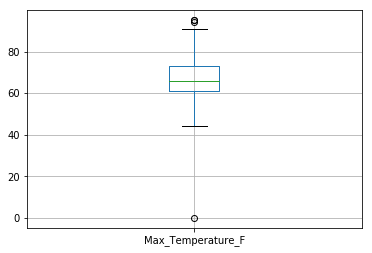

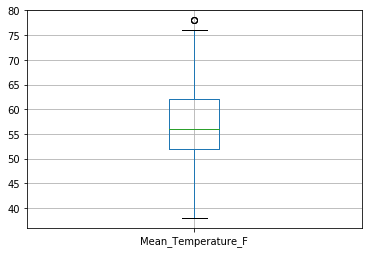

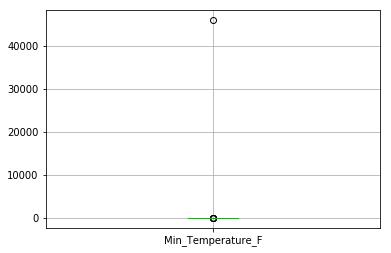

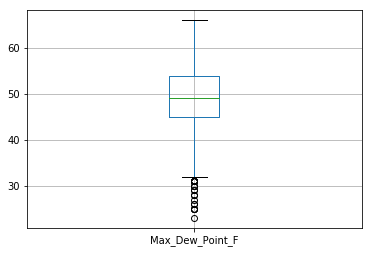

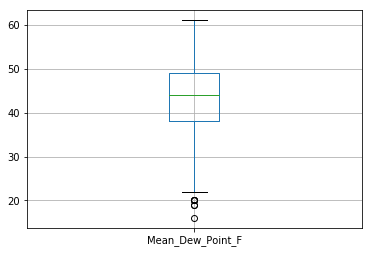

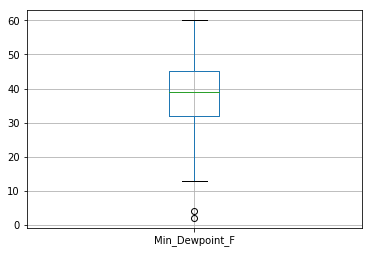

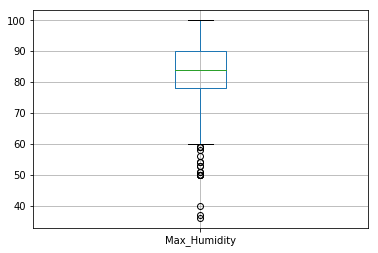

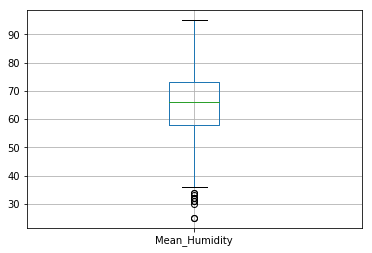

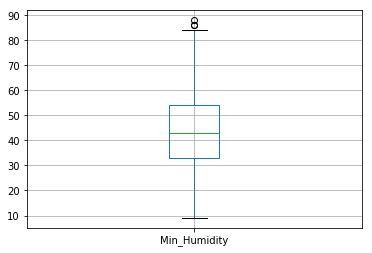

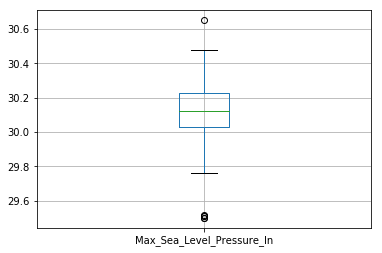

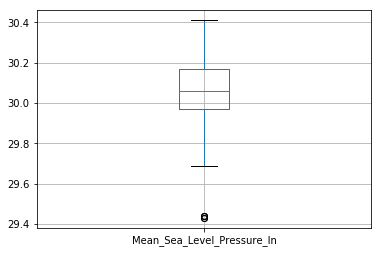

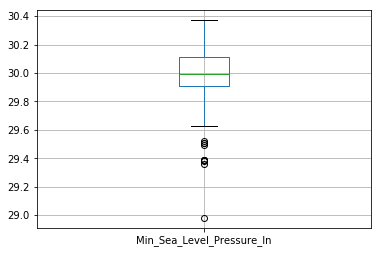

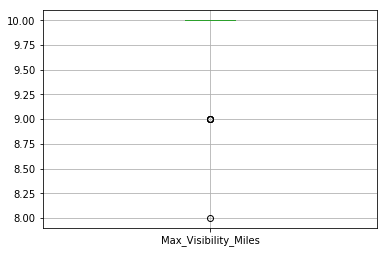

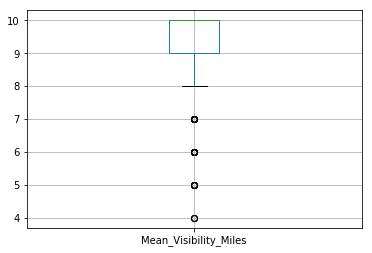

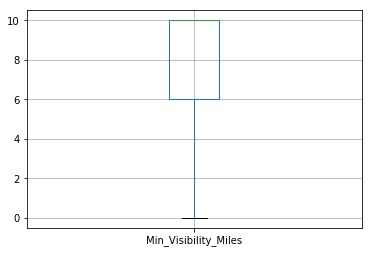

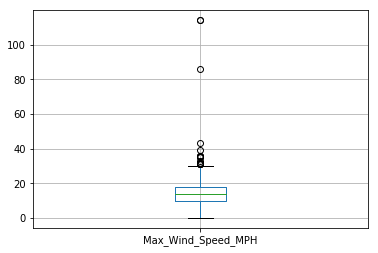

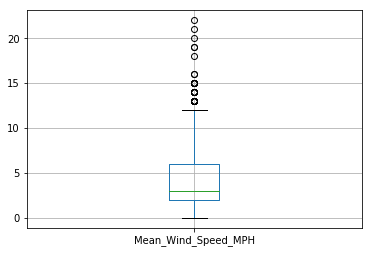

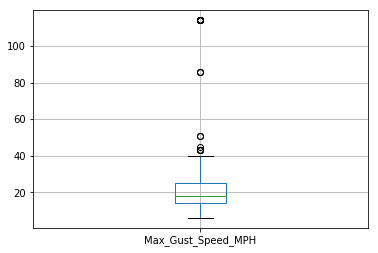

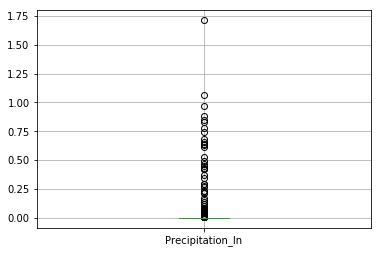

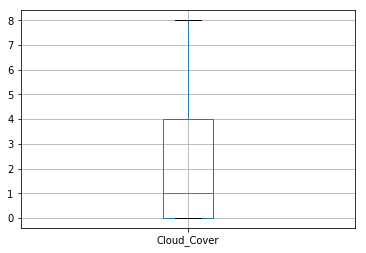

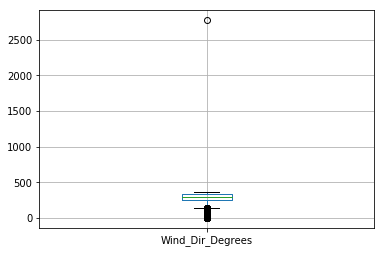

In [332]:
for c in [x for x in weather.columns if weather[x].dtype != 'O']:
    weather.boxplot(c)
    plt.show()

### 6 - exercise
It looks like there are some mistakes in the data. Let's correct those! <br>
- In the Min_Temperature_F column change all data above 40000 to the value in the Mean_Temperature_F column in the same row
- In the Max_Temperature_F column change all data that is 0 to the value in the Mean_Temperature_F column in the same row
- In the Wind_Dir_Degrees column change all data above 360 to 0

In [333]:
weather['Min_Temperature_F'] = np.where(weather['Min_Temperature_F']>40000,
                                       weather['Mean_Temperature_F'], weather['Min_Temperature_F'])

weather['Max_Temperature_F'] = np.where(weather['Max_Temperature_F']==0,
                                       weather['Mean_Temperature_F'], weather['Max_Temperature_F'])

weather['Wind_Dir_Degrees'] = np.where(weather['Wind_Dir_Degrees']>360,0, weather['Wind_Dir_Degrees'])

### 6 - check yourself

Plot these columns using boxplots again to see if the transformation was succesfull!

### 7 - exercise
### Preparing for joining the dataframes

For joining weather data to trip data, we'll have to know the landmark of each trip. For that we'll use the zip code information from the station dataframe. We also have to use the date, which first needs to be transformed. <br>
Let's start with that! <br><br>

- Load the trip_filled.csv file into a dataframe called trip. 
- In the trip dataframe create two new columns called 'start_datetime' and 'end_datetime'. These should contain the values from column 'Start Date' and 'End date' converted into datetime. 

Now, that we can use the date values in the weather and the trip dataframe, let's check if they cover the same interval! <br>
- Create six variables called weather_datetime_min, weather_datetime_max, trip_start_date_min, trip_start_date_max, trip_end_date_min and trip_end_date_max containing the minimum and maximum values from the named columns.
- Display them to see if they the two dataframes have the same minimum and maximum date!

In [334]:
### Your code here
import pandas as pd

trip = pd.read_csv('trip_filled.csv')

trip['start_date'] = pd.to_datetime(trip['Start Date'], format='%m/%d/%Y %H:%M')
trip['end_date'] = pd.to_datetime(trip['End Date'], format='%m/%d/%Y %H:%M')
weather['datetime'] = pd.to_datetime(weather['Date'], format='%m/%d/%Y')

weather_datetime_min = weather['datetime'].min()
weather_datetime_max = weather['datetime'].max()
trip_start_date_min = trip['start_date'].min()
trip_start_date_max = trip['start_date'].max()
trip_end_date_min = trip['end_date'].min()
trip_end_date_max = trip['end_date'].max()

### 7 - check yourself

In [335]:
result_dict = {'weather_datetime_min':pd.Timestamp('2013-08-29 00:00:00'),
              'weather_datetime_max':pd.Timestamp('2014-02-28 00:00:00'),
              'trip_start_date_min':pd.Timestamp('2013-08-29 09:08:00'),
              'trip_start_date_max':pd.Timestamp('2023-08-29 14:13:00'),
              'trip_end_date_min':pd.Timestamp('2013-08-29 09:11:00'),
              'trip_end_date_max':pd.Timestamp('2014-03-02 16:52:00')}
for k,v in result_dict.items():
    if eval(k) == v:
        print('{} is correct'.format(k))
    else:
        print('{} is NOT correct'.format(k))

weather_datetime_min is correct
weather_datetime_max is correct
trip_start_date_min is correct
trip_start_date_max is correct
trip_end_date_min is correct
trip_end_date_max is correct


### 8 - exercise

So it looks like that there are some rows with invalid start_date in the trip dataframe. <br>
Let's see, in how many rows is the start_date later than the latest end_date. You can use the trip_end_date_max variable you've created in the previous task. <br>
Save the number of rows into a variable called nb_not_valid_start_date_rows.

In [336]:
nb_not_valid_start_date_rows = len(trip[trip.start_date>trip_end_date_max])

### 8 - check yourself

In [337]:
if nb_not_valid_start_date_rows == 20:
    print('nb_not_valid_start_date_rows is correct')
else:
    print('nb_not_valid_start_date_rows is NOT correct')

nb_not_valid_start_date_rows is correct


### 9 - exercise

As the number of row with invalid start_date is not high, let's just drop them. <br>
Create a new dataframe called trip_valid_start where these rows are dropped.

In [338]:
trip_valid_start = trip[trip.start_date<=trip_end_date_max].copy()

### 9 - check yourself

In [339]:
if len(trip_valid_start) == 143985 and trip_valid_start['start_date'].max()==pd.Timestamp('2014-02-28 23:20:00'):
    print('New dataframe is correct')
else:
    print('Something is not correct with the new dataframe')

New dataframe is correct


### 10 - exercise
In the weather dataframe the datetime refers to a day, while in the trip_valid_start dataframe the dates refer to exact times. <br>
For being able to join, we'll need to create new columns in both dataframes with only the date part of the timestamps. In the trip_valid_start dataframe we'll use the start_date to join on. <br>
In both dataframes create column called date_to_join in which the datetime/start_date column is transformed to datetime.date format! <br>
Using set().intersection and set().difference see how many common and different values are in the date_to_join columns in the two dataframes. Create variables called nb_common and nb_different and save the result into them!

In [340]:
weather['date_to_join'] = weather['datetime'].dt.date
trip_valid_start['date_to_join'] = trip_valid_start['start_date'].dt.date

nb_common = len(set(trip_valid_start.date_to_join.unique()).intersection(set(weather.date_to_join.unique())))
nb_different = len(set(trip_valid_start.date_to_join.tolist()).difference(set(weather.date_to_join.tolist())))

### 10 - check yourself

In [341]:
if nb_common == 184 and nb_different==0:
    print('The date_to_join columns are correct')
else:
    print('Something is not correct')

The date_to_join columns are correct


### 11 - exercise

Let's save the changed dataframes to csv files!

In [342]:
weather.to_csv('/home/esztersomos/Documents/CEU/winter_2019/merging/weather.csv', index=False)

trip_valid_start.to_csv('/home/esztersomos/Documents/CEU/winter_2019/merging/trip.csv', index=False)

+ 1 - exercise

Draw bloxplots of the numeric columns in the weather dataframe that shows the data grouped by the month of the date!

In [343]:
weather['month'] = weather.datetime.dt.month

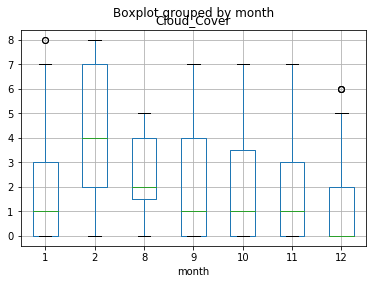

In [344]:
weather.boxplot('Cloud_Cover', by='month')